In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_data = []
Y_data = []

for i in range(777):
    point = np.random.randint(5, 99, 2)
    X_data.append(point)
    Y_data.append(np.zeros(1))

for i in range(777):
    point = np.random.randint(129, 250, 2)
    X_data.append(point)
    Y_data.append(np.ones(1))

In [4]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

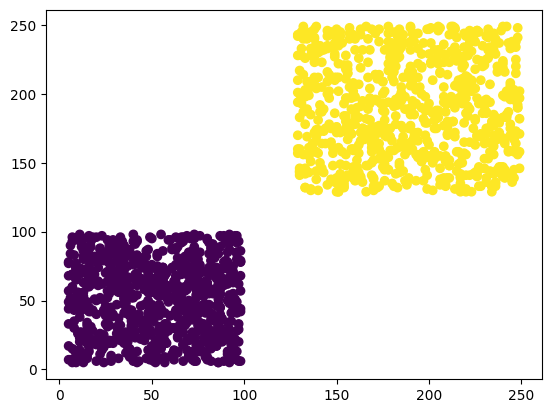

In [8]:
plt.scatter(X_data[:, 0], X_data[:, 1], c = Y_data)

In [9]:
X_data

array([[ 71,  23],
       [ 84,  36],
       [ 53,  54],
       ...,
       [186, 175],
       [137, 164],
       [181, 191]])

In [10]:
from sklearn.utils import shuffle

In [11]:
X_data, Y_data = shuffle(X_data, Y_data, random_state = 100)

In [13]:
split = 0.8

train_X = X_data[:int(split * X_data.shape[0]), :]
train_Y = Y_data[:int(split * Y_data.shape[0])]
test_X = X_data[int(split * X_data.shape[0]):, :]
test_Y = Y_data[int(split * Y_data.shape[0]):]

In [14]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(1243, 2) (1243, 1) (311, 2) (311, 1)


In [21]:
class KNN_classifier:
    def __init__(self, k = 5):
        self.k = k
    
    def initialise_data(self, X, Y):
        self.X = X
        self.Y = Y
        
    def distance_formula(self, point1, point2):
        return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5
    
    def predict(self, test_point):
        distance = []
        for i in range(self.X.shape[0]):
            distance.append((self.distance_formula(test_point, self.X[i]), self.Y[i])) # Self.Y represent the vote of that particular training data
        
        distance = sorted(distance)
        distance = distance[:self.k]
        
        labels = []
        
        for _, i in distance:
            labels.append(i)
        
        all_label, count = np.unique(labels, return_counts = True)
        
        max_count = np.argmax(count)
        
        print(f'Predicted Class: {all_label[max_count]}, Prob: {count[max_count]/np.sum(count)}')
        
        return all_label[max_count], count[max_count]/np.sum(count)

In [22]:
a = [1,2,3,2,1,1,2,21,2,3,1,1,2,2,4,0,2,3,2,1,1,1,0,11]

print(np.unique(a, return_counts = True))

(array([ 0,  1,  2,  3,  4, 11, 21]), array([2, 8, 8, 3, 1, 1, 1], dtype=int64))


In [23]:
knn = KNN_classifier(7)

In [24]:
knn.initialise_data(train_X, train_Y)

In [25]:
knn.predict(test_X[0])

Predicted Class: 1.0, Prob: 1.0


(1.0, 1.0)

In [26]:
test_Y[0]

array([1.])

In [27]:
corr = 0

for i in range(test_X.shape[0]):
    pred, prob = knn.predict(test_X[i])
    if (pred == test_Y[i]):
        corr += 1
print(corr/test_X.shape[0])

Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 1.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicted Class: 0.0, Prob: 1.0
Predicte